In [1]:
#Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import matplotlib.ticker as ticker

/usr/local/lib/python3.9/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
# pip install fredapi

In [3]:
from fredapi import Fred

import yfinance as yf
from fredapi import Fred

**Step 3**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed


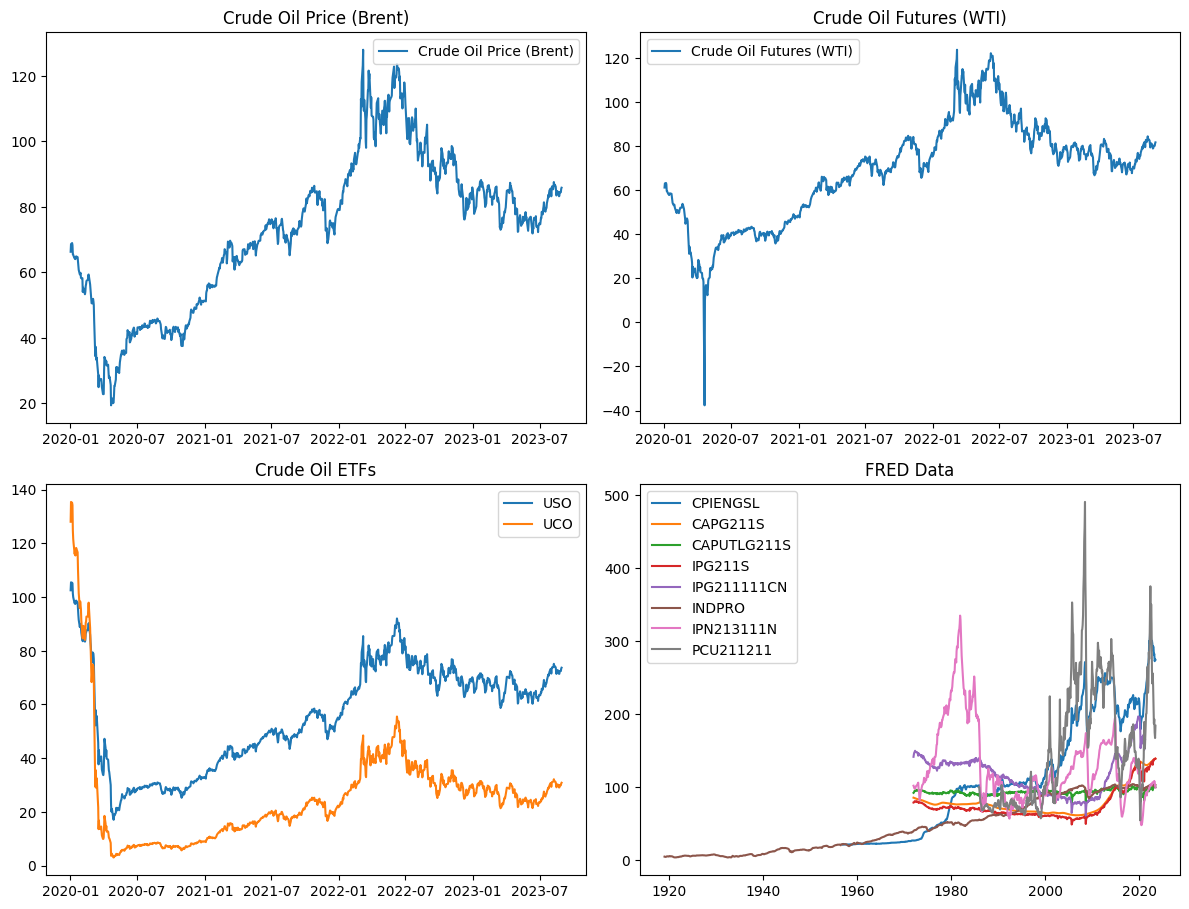

In [4]:


# Define the symbols for crude oil price, crude oil futures, and crude oil ETFs
crude_oil_price_symbol = 'BZ=F'  # Crude oil futures symbol for Brent Crude
crude_oil_futures_symbol = 'CL=F'  # Crude oil futures symbol for WTI Crude
crude_oil_etf_symbols = ['USO', 'UCO']  # Example ETF symbols (USO and UCO)

# Define FRED series symbols
fred = Fred(api_key='d903040af43ddeb65a262da581e0b5e4')
fred_series_symbols = ['CPIENGSL', 'CAPG211S', 'CAPUTLG211S', 'IPG211S', 'IPG211111CN', 'INDPRO', 'IPN213111N', 'PCU211211']

# Define the common start date for both datasets
start_date = '2020-01-01'

# Download financial data using yfinance
crude_oil_price_data = yf.download(crude_oil_price_symbol, start=start_date)
crude_oil_futures_data = yf.download(crude_oil_futures_symbol, start=start_date)
crude_oil_etf_data = yf.download(crude_oil_etf_symbols, start=start_date)

# Download FRED data
fred_data = {symbol: fred.get_series(symbol, start_date=start_date) for symbol in fred_series_symbols}

# Plotting the data
plt.figure(figsize=(12, 18))

# Crude Oil Price Data
plt.subplot(4, 2, 1)
plt.plot(crude_oil_price_data['Close'], label='Crude Oil Price (Brent)')
plt.title('Crude Oil Price (Brent)')
plt.legend()

# Crude Oil Futures Data
plt.subplot(4, 2, 2)
plt.plot(crude_oil_futures_data['Close'], label='Crude Oil Futures (WTI)')
plt.title('Crude Oil Futures (WTI)')
plt.legend()

# Crude Oil ETF Data
plt.subplot(4, 2, 3)
for symbol in crude_oil_etf_symbols:
    plt.plot(crude_oil_etf_data['Close'][symbol], label=symbol)
plt.title('Crude Oil ETFs')
plt.legend()

# FRED Data
plt.subplot(4, 2, 4)
for symbol, data in fred_data.items():
    plt.plot(data, label=symbol)
plt.title('FRED Data')
plt.legend()

plt.tight_layout()
plt.show()


**Step 4**

In [5]:
# Create a dictionary of the data used
data_dict = {
    'Crude Oil Price': crude_oil_price_data,
    'Crude Oil Futures': crude_oil_futures_data,
    'Crude Oil ETFs': crude_oil_etf_data
}

# Add FRED data to the data dictionary
for symbol, data in fred_data.items():
    data_dict[symbol] = data

# Create a table to display information about the data
data_info = []
for key, data in data_dict.items():
    if isinstance(data, pd.DataFrame):
        frequency = 'Daily'
        source = 'Yahoo Finance'
        start_date = data.index.min().strftime('%Y-%m-%d')
        end_date = data.index.max().strftime('%Y-%m-%d')
    else:
        frequency = 'Monthly'
        source = 'FRED'
        start_date = data.index.min().strftime('%Y-%m-%d')
        end_date = data.index.max().strftime('%Y-%m-%d')

    data_info.append([key, frequency, source, start_date, end_date])

info_table = pd.DataFrame(data_info, columns=['Data', 'Frequency', 'Source', 'Start Date', 'End Date'])
print(info_table)

                 Data Frequency         Source  Start Date    End Date
0     Crude Oil Price     Daily  Yahoo Finance  2020-01-02  2023-08-30
1   Crude Oil Futures     Daily  Yahoo Finance  2020-01-02  2023-08-30
2      Crude Oil ETFs     Daily  Yahoo Finance  2020-01-02  2023-08-30
3            CPIENGSL   Monthly           FRED  1957-01-01  2023-07-01
4            CAPG211S   Monthly           FRED  1972-01-01  2023-07-01
5         CAPUTLG211S   Monthly           FRED  1972-01-01  2023-07-01
6             IPG211S   Monthly           FRED  1972-01-01  2023-07-01
7         IPG211111CN   Monthly           FRED  1972-01-01  2021-04-01
8              INDPRO   Monthly           FRED  1919-01-01  2023-07-01
9          IPN213111N   Monthly           FRED  1972-01-01  2023-07-01
10          PCU211211   Monthly           FRED  1985-12-01  2023-07-01


**Step 5**

In [6]:
# Create a dictionary of the data used
data_dict = {
    'Crude Oil Price': crude_oil_price_data['Close'],
    'Crude Oil Futures': crude_oil_futures_data['Close'],
    'Crude Oil ETFs': {
        'UCO': crude_oil_etf_data['Adj Close']['UCO'],
        'USO': crude_oil_etf_data['Adj Close']['USO']
    }
}

# Add FRED data to the data dictionary
for symbol, data in fred_data.items():
    data_dict[symbol] = data

# Identify extreme values (outliers)
def identify_outliers(series, threshold=3):
    z_scores = np.abs((series - series.mean()) / series.std())
    outliers = z_scores > threshold
    return outliers

# Identify missing data
def identify_missing_data(series):
    return series.isnull()

def get_correlated_columns(data):
    corr_matrix = data.corr().abs()
    # get upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)>0)
    # find features with correlation greater than 0.95
    correlated_cols = [column for column in upper.columns if any(upper[column] > 0.95)]
    return correlated_cols
    
# Check for extreme values and missing data
for key, data in data_dict.items():
    if isinstance(data, pd.Series):
        outliers = identify_outliers(data)
        missing_data = identify_missing_data(data)
        
        print(f"Extreme values in {key}: {data.index[outliers]}")
        print(f"Missing data in {key}: {data.index[missing_data]}")

Extreme values in Crude Oil Price: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
Missing data in Crude Oil Price: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
Extreme values in Crude Oil Futures: DatetimeIndex(['2020-04-20'], dtype='datetime64[ns]', name='Date', freq=None)
Missing data in Crude Oil Futures: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
Extreme values in CPIENGSL: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Missing data in CPIENGSL: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Extreme values in CAPG211S: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Missing data in CAPG211S: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Extreme values in CAPUTLG211S: DatetimeIndex(['2005-09-01', '2005-10-01', '2008-09-01', '2020-05-01',
               '2021-02-01'],
              dtype='datetime64[ns]', freq=None)
Missing data in CAPUTLG211S: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
E

**Step 6**

In [7]:
# Combine cleaning methods
sterilized_data_dict = {}
for key, data in data_dict.items():
    if isinstance(data, pd.Series):
        missing_data = identify_missing_data(data)
        outliers = identify_outliers(data)

        # Apply cleaning: Remove rows with missing values and extreme values
        cleaned_data = data[~missing_data & ~outliers]
        sterilized_data_dict[key] = cleaned_data

# Printing cleaned data lengths
for key, data in sterilized_data_dict.items():
    print(f"Length of {key} after cleaning: {len(data)}")

Length of Crude Oil Price after cleaning: 919
Length of Crude Oil Futures after cleaning: 921
Length of CPIENGSL after cleaning: 799
Length of CAPG211S after cleaning: 619
Length of CAPUTLG211S after cleaning: 614
Length of IPG211S after cleaning: 614
Length of IPG211111CN after cleaning: 592
Length of INDPRO after cleaning: 1255
Length of IPN213111N after cleaning: 608
Length of PCU211211 after cleaning: 449


In [8]:
sterilized_df = pd.DataFrame(sterilized_data_dict)
# drop highly correlated features
correlated_columns = get_correlated_columns(sterilized_df)
sterilized_df.drop(correlated_columns, axis=1, inplace=True)
sterilized_df

,Crude Oil Price,CAPG211S,CAPUTLG211S,IPG211111CN,INDPRO,IPN213111N,PCU211211
1919-01-01,NaN,NaN,NaN,NaN,4.8665,NaN,NaN
1919-02-01,NaN,NaN,NaN,NaN,4.6514,NaN,NaN
1919-03-01,NaN,NaN,NaN,NaN,4.5170,NaN,NaN
1919-04-01,NaN,NaN,NaN,NaN,4.5976,NaN,NaN
1919-05-01,NaN,NaN,NaN,NaN,4.6245,NaN,NaN
...,...,...,...,...,...,...,...
2023-08-24,83.360001,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-25,84.480003,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-28,84.419998,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-29,85.489998,NaN,NaN,NaN,NaN,NaN,NaN


**Step 7**

<Figure size 1200x600 with 0 Axes>

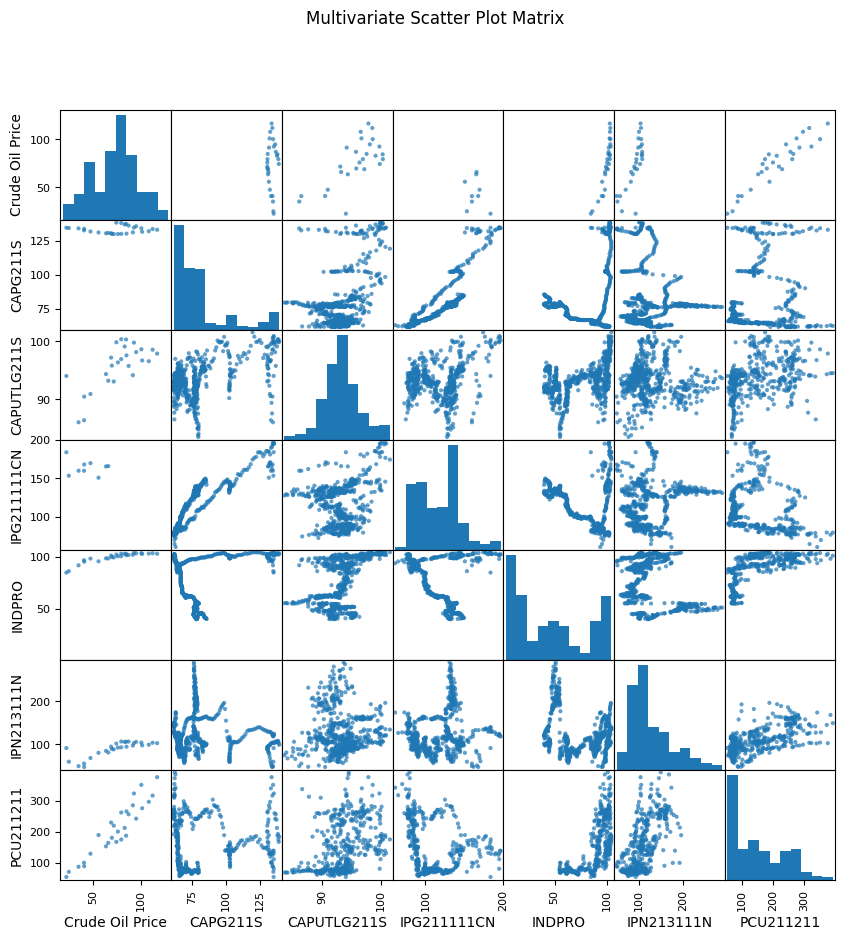

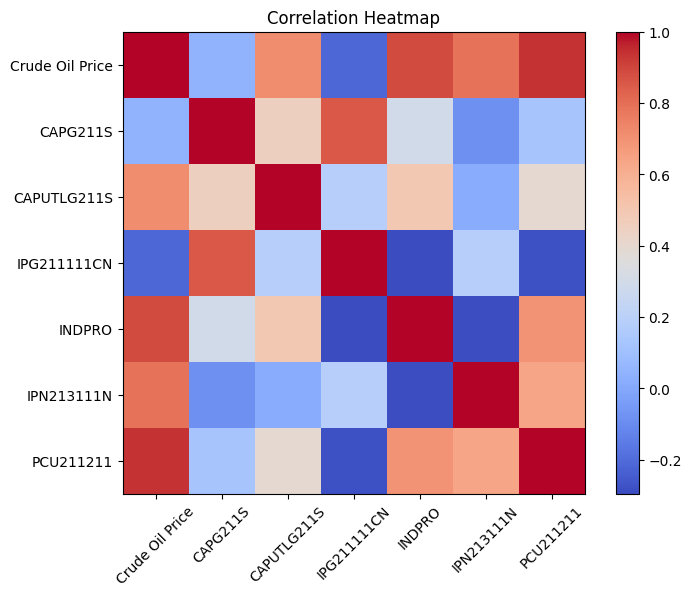

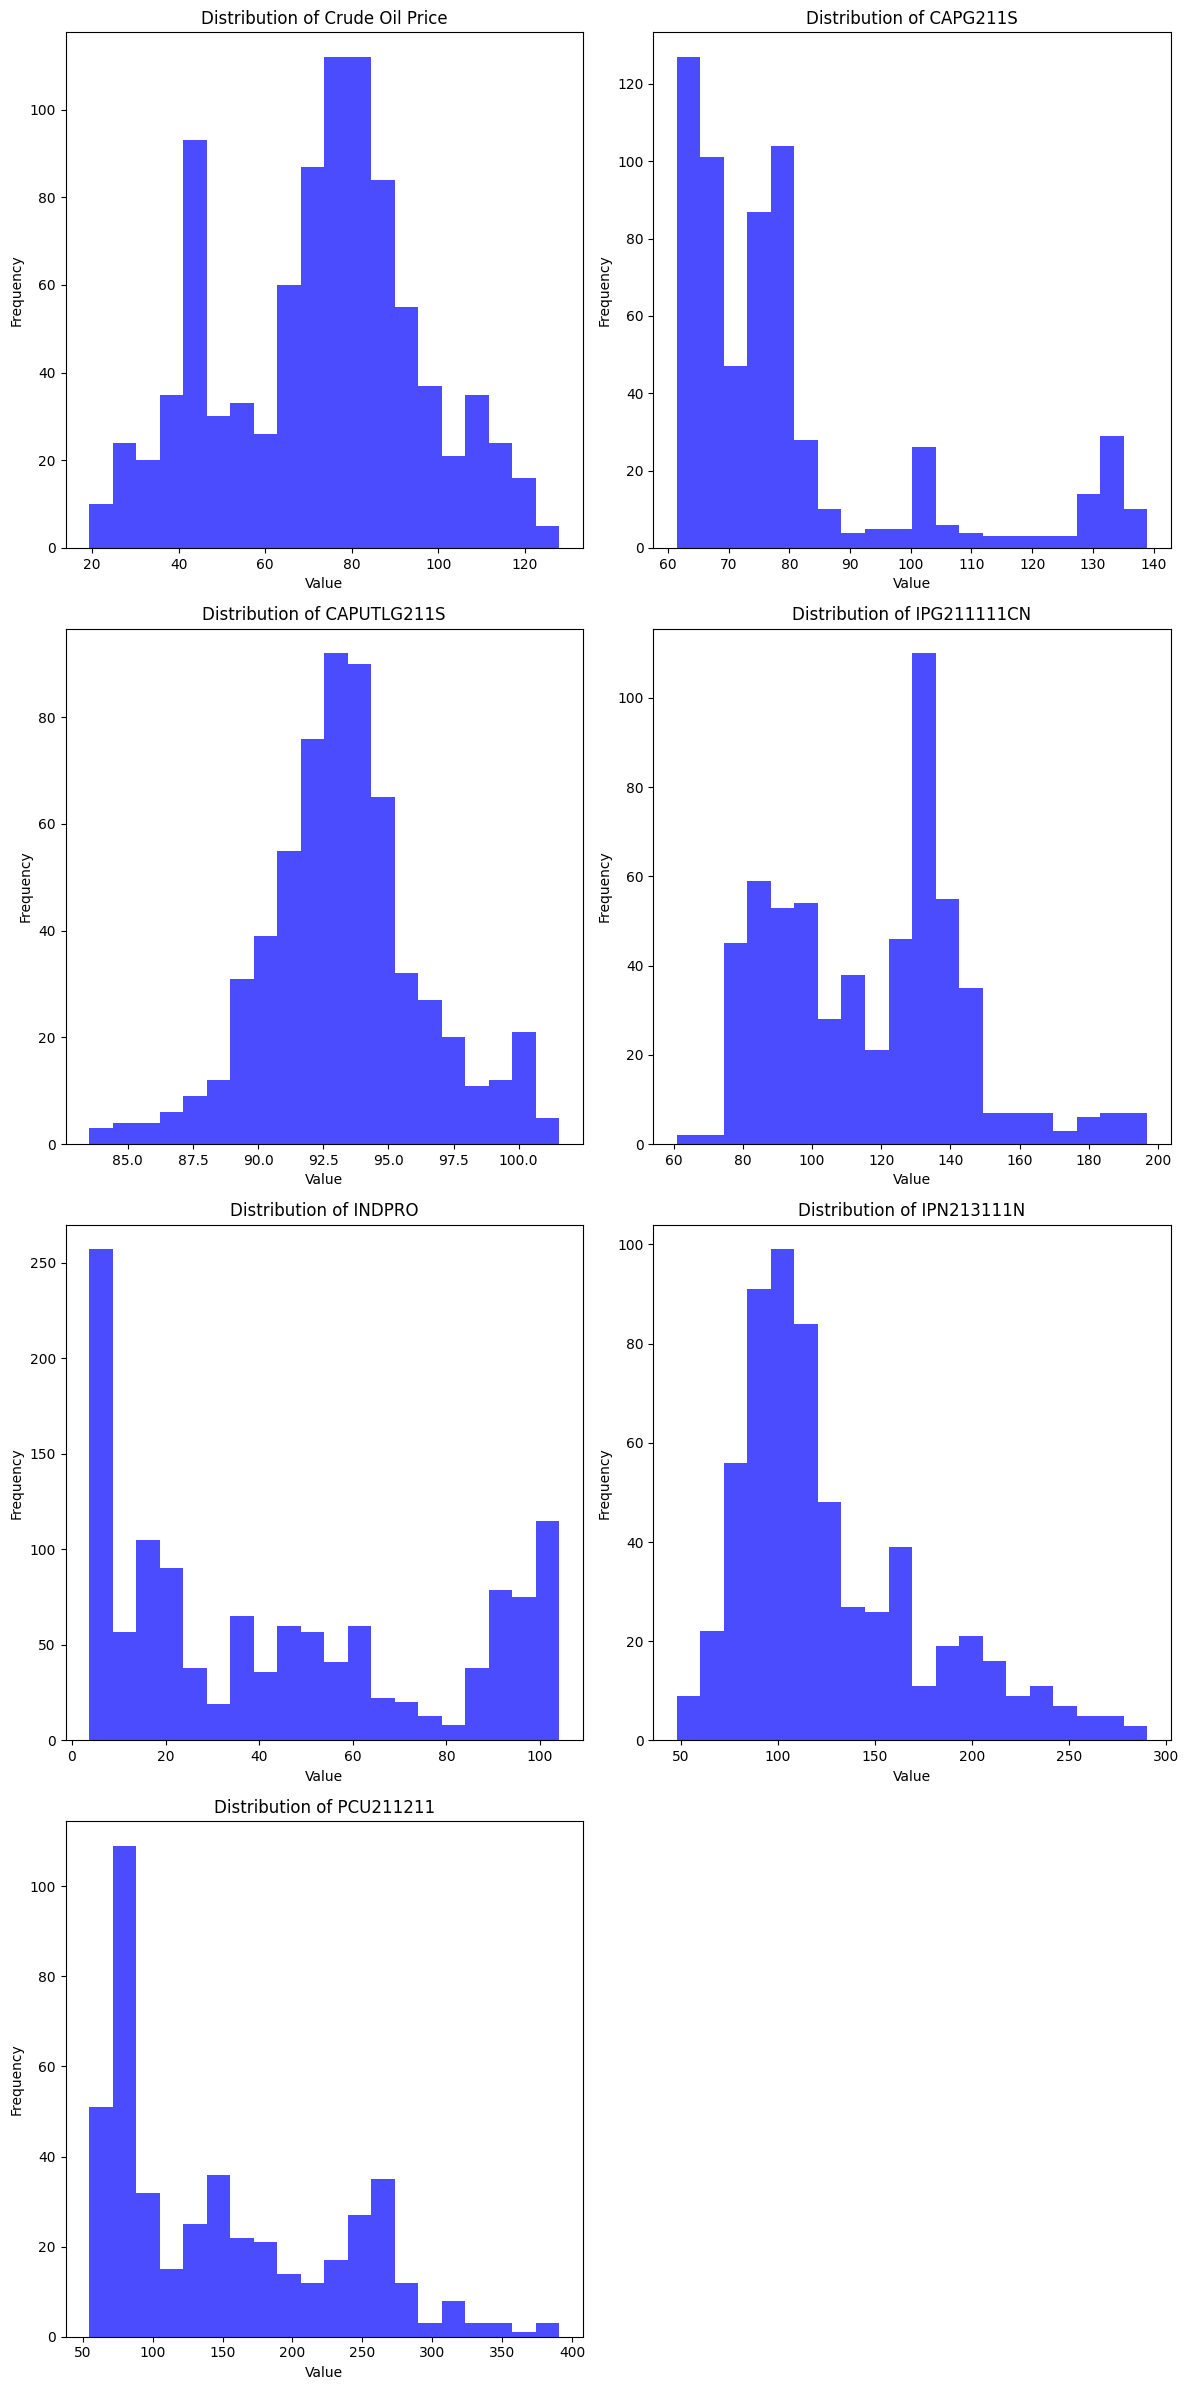

In [9]:
# Combine all data into a single DataFrame
combined_data = pd.concat([
    sterilized_df,
    # Add more columns here for other FRED data you want to include
], axis=1)

# Create multivariate plots
plt.figure(figsize=(12, 6))

# Scatter plot matrix
pd.plotting.scatter_matrix(combined_data, alpha=0.7, figsize=(10, 10), diagonal='hist')
plt.suptitle("Multivariate Scatter Plot Matrix")

# Correlation heatmap
plt.figure(figsize=(8, 6))
plt.title("Correlation Heatmap")
correlation_matrix = combined_data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

# Distributional plots
num_columns = len(combined_data.columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows based on the number of columns

plt.figure(figsize=(12, 6 * num_rows))
for i, column in enumerate(combined_data.columns, 1):
    plt.subplot(num_rows, 2, i)  # Create individual subplot for each column
    plt.hist(combined_data[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Step 8**

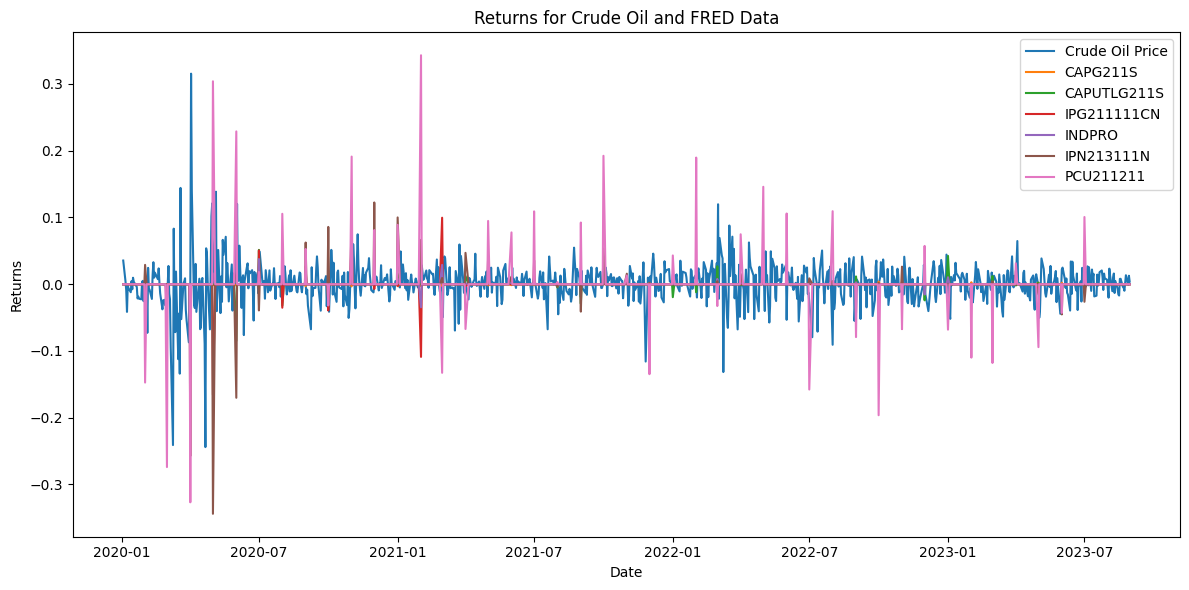

In [10]:
# Calculate returns
returns_data = combined_data.pct_change().dropna()

# Plot returns
plt.figure(figsize=(12, 6))
for column in returns_data.columns:
    plt.plot(returns_data.index, returns_data[column], label=column)

plt.title("Returns for Crude Oil and FRED Data")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.tight_layout()
plt.show()


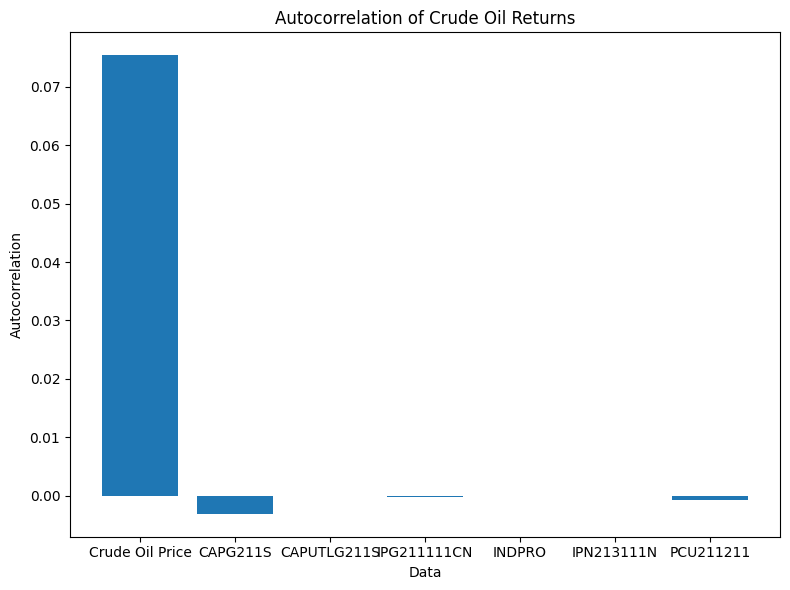

In [11]:
# Calculate autocorrelation of oil returns
oil_returns = returns_data
autocorr_oil = oil_returns.apply(lambda col: col.autocorr(), axis=0)

# Plot autocorrelation
plt.figure(figsize=(8, 6))
plt.bar(autocorr_oil.index, autocorr_oil)
plt.title("Autocorrelation of Crude Oil Returns")
plt.xlabel("Data")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.show()


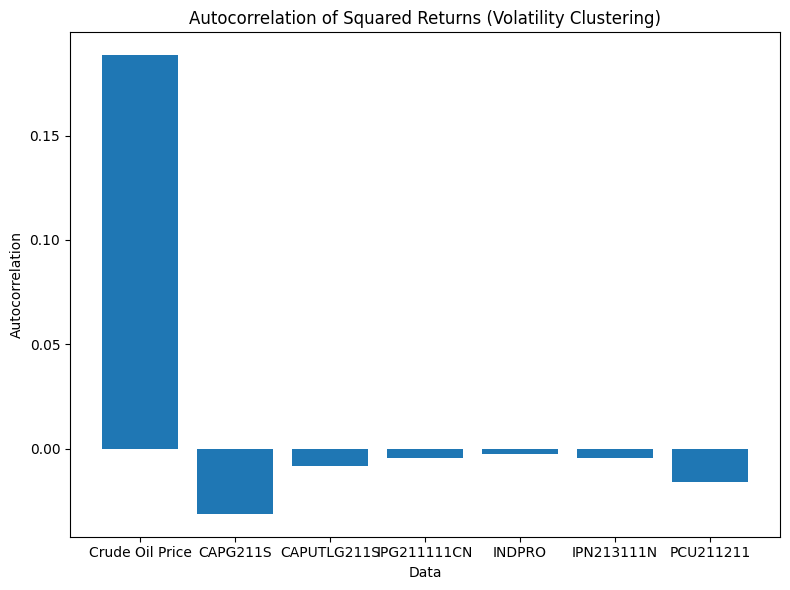

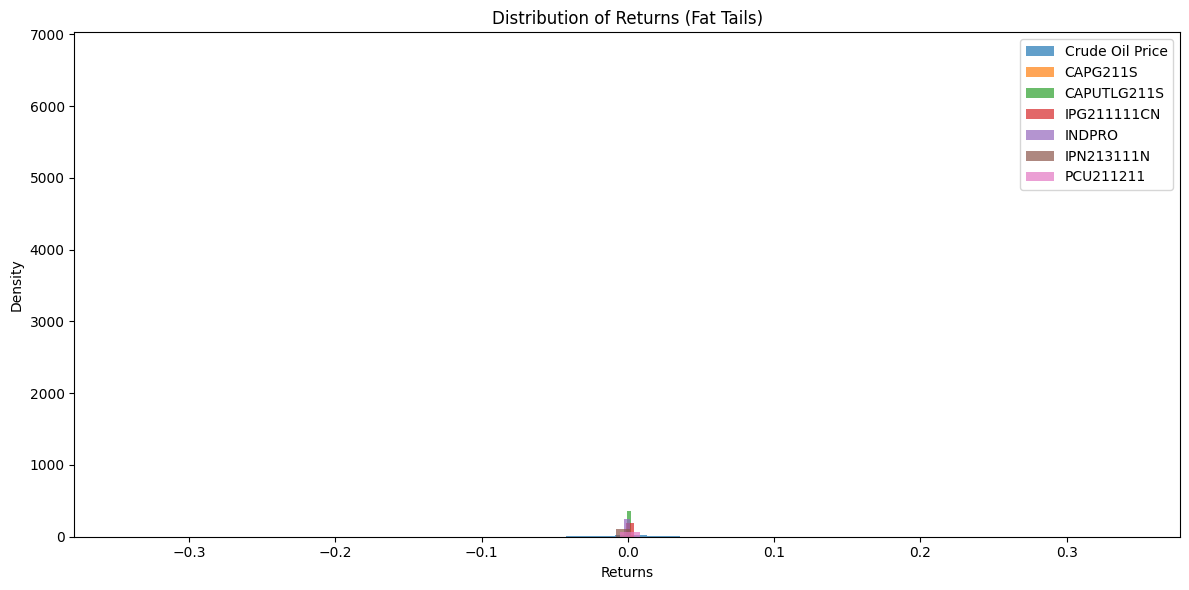

In [12]:
# Calculate daily returns
returns = combined_data.pct_change().dropna()

# Plot 1: Volatility Clustering (Autocorrelation of Squared Returns)
squared_returns = returns ** 2
autocorr_squared_returns = squared_returns.apply(lambda col: col.autocorr(), axis=0)

plt.figure(figsize=(8, 6))
plt.bar(autocorr_squared_returns.index, autocorr_squared_returns)
plt.title("Autocorrelation of Squared Returns (Volatility Clustering)")
plt.xlabel("Data")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.show()

# Plot 2: Distribution of Returns (Fat Tails)
plt.figure(figsize=(12, 6))
for column in returns.columns:
    plt.hist(returns[column], bins=50, density=True, alpha=0.7, label=column)

plt.title("Distribution of Returns (Fat Tails)")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()



